In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

In [2]:
SacDelivery_path = "Final_Yelp_Data.csv"

In [3]:
# Remove columns that we don't need
SacDelivery = pd.read_csv(SacDelivery_path)
del SacDelivery['Unnamed: 0.1'],SacDelivery['Unnamed: 0'],SacDelivery['distance'],SacDelivery['is_closed']
del SacDelivery['image_url'],SacDelivery['phone'],SacDelivery['display_phone'],SacDelivery['price']
SacDelivery.head()

,id,alias,name,url,review_count,categories,rating,coordinates,transactions,location
0,Y3HNUBQJHAzWnnhk3iReiA,junoon-flavors-of-india-sacramento-2,Junoon Flavors Of India,https://www.yelp.com/biz/junoon-flavors-of-ind...,20,"[{'alias': 'indpak', 'title': 'Indian'}]",5.0,"{'latitude': 38.570471, 'longitude': -121.4571...",[],"{'address1': '3672 J St', 'address2': None, 'a..."
1,9GhIDT1D_8-0ZxKDIB2WpA,shake-shack-sacramento,Shake Shack,https://www.yelp.com/biz/shake-shack-sacrament...,168,"[{'alias': 'burgers', 'title': 'Burgers'}, {'a...",3.0,"{'latitude': 38.568686, 'longitude': -121.487243}",['delivery'],"{'address1': '1710 R St', 'address2': 'Ste 190..."
2,LwiOfwMNDndIPm3QSh8wFQ,south-sacramento,South,https://www.yelp.com/biz/south-sacramento?adju...,1590,"[{'alias': 'southern', 'title': 'Southern'}]",4.0,"{'latitude': 38.5687015705627, 'longitude': -1...",['delivery'],"{'address1': '2005 11th St', 'address2': '', '..."
3,myoaFyZ9RIG_p2rkOQiWlA,fixins-soul-kitchen-sacramento-2,Fixins Soul Kitchen,https://www.yelp.com/biz/fixins-soul-kitchen-s...,946,"[{'alias': 'soulfood', 'title': 'Soul Food'}, ...",4.5,"{'latitude': 38.55147, 'longitude': -121.46924}",['delivery'],"{'address1': '3428 3rd Ave', 'address2': '', '..."
4,rQaH3Jr6BxFhX5pXa6W6_w,chando-s-tacos-sacramento,Chando’s Tacos,https://www.yelp.com/biz/chando-s-tacos-sacram...,14,"[{'alias': 'mexican', 'title': 'Mexican'}]",4.5,"{'latitude': 38.564075, 'longitude': -121.4340...",[],"{'address1': '5644 J St', 'address2': '', 'add..."


In [4]:
# Check for dtypes
SacDelivery.dtypes

id               object
alias            object
name             object
url              object
review_count      int64
categories       object
rating          float64
coordinates      object
transactions     object
location         object
dtype: object

In [5]:
SacDelivery['name'].value_counts()
# Noticed that there are multiple instances of certain restaurants
# We will want to groupby restaurant name and get means that way

SacDelivery.groupby(['name']).mean()

,review_count,rating
name,,
3- N -1 BBQ,1.0,5.0
8th Street Pizza,119.0,4.0
916 Mexican Restaurant & Sports Bar,17.0,3.0
A&W,2.0,2.5
A&W Restaurant,3.0,2.5
...,...,...
ZOE Coffee and Tacos,31.0,5.0
Zelda's Original Gourmet Pizza,882.0,3.5
Zócalo,1315.0,4.0


In [6]:
SacDelivery['transactions'].value_counts()
# Need to look in each value and see if delivery is in the list

['delivery']                                        269
[]                                                  161
['pickup', 'delivery']                               92
['delivery', 'pickup']                               76
['pickup']                                            7
['restaurant_reservation', 'delivery']                3
['restaurant_reservation', 'pickup', 'delivery']      2
['restaurant_reservation']                            2
['restaurant_reservation', 'delivery', 'pickup']      1
Name: transactions, dtype: int64

In [7]:
SacDelivery["Delivery?"] = SacDelivery['transactions'].str.contains('delivery')
DeliveryData = SacDelivery.groupby(['Delivery?','name']).mean()
DeliveryData
# Need to get the means of the 

review_count  rating
Delivery? name                                                
False     3- N -1 BBQ                              1.0     5.0
          A&W Restaurant                           3.0     2.5
          A1 Foods                                18.0     4.5
          All Angle BBQ                            7.0     1.0
          Anh Hong - Bo 7 Mon                     63.0     3.5
...                                                ...     ...
True      Yue Huang                              591.0     3.5
          Yum Cha Cafe                            11.0     3.5
          Zelda's Original Gourmet Pizza         882.0     3.5
          Zócalo                                1315.0     4.0
          kultura cafe                            39.0     5.0

[525 rows x 2 columns]

In [8]:
# Look at rating data
RatingData = SacDelivery.groupby(['Delivery?','name']).agg({'rating': ['mean']})
RatingData.columns = ['Rating_mean']
RatingData = RatingData.reset_index()
RatingData = RatingData.rename(columns={"name":"Restaurant Name"})
RatingData

,Delivery?,Restaurant Name,Rating_mean
0,False,3- N -1 BBQ,5.0
1,False,A&W Restaurant,2.5
2,False,A1 Foods,4.5
3,False,All Angle BBQ,1.0
4,False,Anh Hong - Bo 7 Mon,3.5
...,...,...,...
520,True,Yue Huang,3.5
521,True,Yum Cha Cafe,3.5
522,True,Zelda's Original Gourmet Pizza,3.5
523,True,Zócalo,4.0


In [9]:
# Look at review_count data
ReviewCountData = SacDelivery.groupby(['Delivery?','name']).agg({'review_count': ['mean']})
ReviewCountData.columns = ['Review Count Mean']
ReviewCountData = ReviewCountData.reset_index()
ReviewCountData = ReviewCountData.rename(columns={"name":"Restaurant Name"})
ReviewCountData

,Delivery?,Restaurant Name,Review Count Mean
0,False,3- N -1 BBQ,1.0
1,False,A&W Restaurant,3.0
2,False,A1 Foods,18.0
3,False,All Angle BBQ,7.0
4,False,Anh Hong - Bo 7 Mon,63.0
...,...,...,...
520,True,Yue Huang,591.0
521,True,Yum Cha Cafe,11.0
522,True,Zelda's Original Gourmet Pizza,882.0
523,True,Zócalo,1315.0


In [10]:
RatingsAndReviews = pd.merge(RatingData, ReviewCountData, on="Restaurant Name")
RatingsAndReviews
del RatingsAndReviews['Delivery?_x']
RatingsAndReviews = RatingsAndReviews.rename(columns={"Delivery?_y":"Delivery?"})
RatingsAndReviews

,Restaurant Name,Rating_mean,Delivery?,Review Count Mean
0,3- N -1 BBQ,5.0,False,1.0
1,A&W Restaurant,2.5,False,3.0
2,A1 Foods,4.5,False,18.0
3,All Angle BBQ,1.0,False,7.0
4,Anh Hong - Bo 7 Mon,3.5,False,63.0
...,...,...,...,...
540,Yue Huang,3.5,True,591.0
541,Yum Cha Cafe,3.5,True,11.0
542,Zelda's Original Gourmet Pizza,3.5,True,882.0
543,Zócalo,4.0,True,1315.0


In [11]:
delivery_yes = RatingsAndReviews[RatingsAndReviews["Delivery?"]==True]
delivery_yes

,Restaurant Name,Rating_mean,Delivery?,Review Count Mean
17,Burger King,4.0,True,73.0
19,Burger King,1.5,True,73.0
28,Carl's Jr,2.5,True,48.0
30,Carl's Jr,2.0,True,48.0
32,Carolina's Mexican Food,2.0,True,152.5
...,...,...,...,...
540,Yue Huang,3.5,True,591.0
541,Yum Cha Cafe,3.5,True,11.0
542,Zelda's Original Gourmet Pizza,3.5,True,882.0
543,Zócalo,4.0,True,1315.0


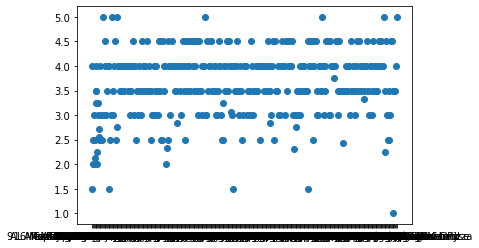

In [12]:
plt.scatter((delivery_yes["Restaurant Name"]), delivery_yes["Rating_mean"])

In [13]:
delivery_no = RatingsAndReviews[RatingsAndReviews["Delivery?"]==False]
delivery_no

,Restaurant Name,Rating_mean,Delivery?,Review Count Mean
0,3- N -1 BBQ,5.0,False,1.0
1,A&W Restaurant,2.5,False,3.0
2,A1 Foods,4.5,False,18.0
3,All Angle BBQ,1.0,False,7.0
4,Anh Hong - Bo 7 Mon,3.5,False,63.0
...,...,...,...,...
173,World Famous Hotboys,4.5,False,2.0
174,Yum Buffet and Grill,3.0,False,313.0
175,Yum Yum Donuts,3.0,False,120.0
176,ZOE Coffee and Tacos,5.0,False,31.0


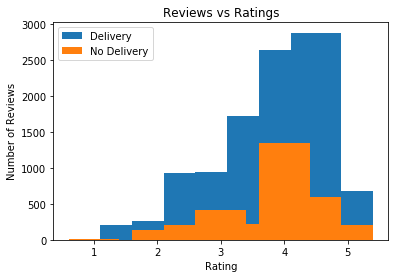

In [37]:
Labels=["Delivery", "No Delivery"]
plt.title("Reviews vs Ratings")
plt.xlabel("Rating")
plt.ylabel("Number of Reviews")

plt.bar((delivery_yes["Rating_mean"]), delivery_yes["Review Count Mean"], label="Delivery")
plt.bar((delivery_no["Rating_mean"]), delivery_no["Review Count Mean"], label="No Delivery")
plt.legend(Labels,loc=0)
plt.show()